# Magnetoresistance
-Ashwin Kharat


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import matplotlib.ticker as mtick


print("imported")

imported


In [9]:
df = pd.read_excel(r'/home/ashwin/Git/general-physics-lab/magnetoresistance/magnetoresistance.xlsx')
print(df)

    calibration_i  calibration_H  Unnamed: 2  observation_i  observation_mV
0            0.12            125         NaN           0.00          154.47
1            0.25            335         NaN           0.25          155.00
2            0.50            621         NaN           0.50          155.50
3            0.75            788         NaN           0.75          156.10
4            1.02           1078         NaN           1.00          156.80
5            1.25           1355         NaN           1.25          157.40
6            1.50           1637         NaN           1.50          158.00
7            1.75           1833         NaN           1.75          158.60
8            2.01           2100         NaN           2.00          159.40
9            2.25           2360         NaN           2.25          160.20
10           2.50           2620         NaN           2.50          161.10
11           2.75           2810         NaN           2.75          161.80
12          

In [16]:
#Importing the necessary values form datasheet
calibration_i=df['calibration_i'].to_numpy()
calibration_H=df['calibration_H'].to_numpy()

calibration_H=calibration_H/1000   #Converting in killo gauss

observation_i=df['observation_i'].to_numpy()
observation_mV=df['observation_mV'].to_numpy()

In [17]:
#Setting up constants and leastcount
I = 3.00 #mA

delta_V = 0.0001 #V least count
delta_I = 0.1 #mA least count

delta_gauss = 0.1/1000 #gauss /1000 in killo gausss
delta_ccs = 0.01 #Amps

In [18]:

result = linregress(calibration_i, calibration_H)

m = result.slope
b = result.intercept
delta_m = result.stderr 


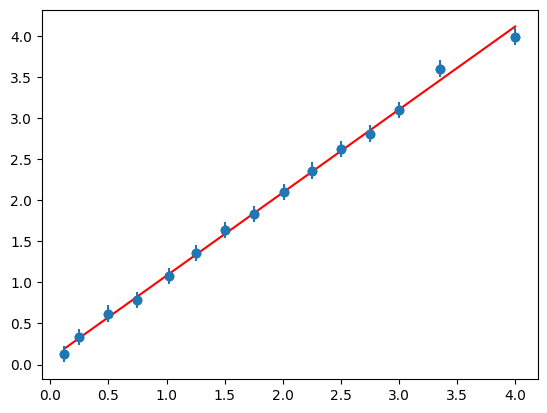

In [32]:
plt.scatter(calibration_i, calibration_H)
plt.plot(calibration_i, np.array(calibration_i) * m + b , color="red")  

plt.errorbar(calibration_i, calibration_H,yerr = delta_gauss,fmt='o')
plt.show()

In [33]:
delta_m

0.01410926415781056

In [34]:
m

1.0108213044916867

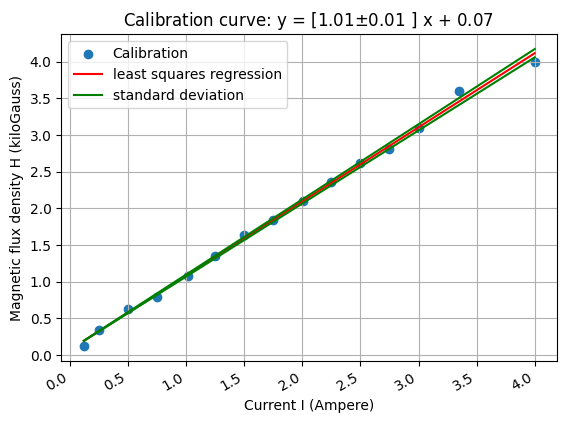

In [41]:
fig2 = plt.figure()

ay = fig2.add_subplot(111)


ay.scatter(calibration_i, calibration_H,label = 'Calibration')

ay.plot(calibration_i, np.array(calibration_i) * m + b , color="red",label = 'least squares regression')
ay.plot(calibration_i, np.array(calibration_i) * (m +delta_m ) + b , color="green",label = 'standard deviation')
ay.plot(calibration_i, np.array(calibration_i) * (m-delta_m) + b , color="green")



#ay.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
#ay.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))


plt.xlabel(r"Current I (Ampere)")
plt.ylabel(r"Magnetic flux density H (kiloGauss)")
fig2.autofmt_xdate()
plt.grid("TRUE")
plt.title("Calibration curve: y = [{0}$\pm{1}$ ] x + {2} ".format(round(m,2),round(delta_m,2),round(b,2) ))
ay.legend()
plt.show()

In [51]:
H = np.array(observation_i) * m + b 
Rm = observation_mV/I

deltaR_by_R = (Rm-Rm[0])*1000/Rm
log_H_e2 = np.log(H * 100)
log_deltaR_by_R = np.log(deltaR_by_R)


table = {'Current (A) ': observation_i*1000,
         'Mag. Field (H KG) ': H,
         'Voltage': observation_mV,
         'Rm ': Rm,
         'delta R / R *1000 ': deltaR_by_R,
         'log_H_e2': log_H_e2,
        'log_deltaR_by_R':log_deltaR_by_R
        }

# log to base e is used and the Temp in Table is in terms of 10^-3

dataframe = pd.DataFrame(table)
print(dataframe)

    Current (A)   Mag. Field (H KG)   Voltage        Rm   delta R / R *1000   \
0            0.0            0.001225   154.47  51.490000            0.000000   
1          250.0            0.001478   155.00  51.666667            3.419355   
2          500.0            0.001731   155.50  51.833333            6.623794   
3          750.0            0.001983   156.10  52.033333           10.442024   
4         1000.0            0.002236   156.80  52.266667           14.859694   
5         1250.0            0.002489   157.40  52.466667           18.614994   
6         1500.0            0.002741   158.00  52.666667           22.341772   
7         1750.0            0.002994   158.60  52.866667           26.040353   
8         2000.0            0.003247   159.40  53.133333           30.928482   
9         2250.0            0.003500   160.20  53.400000           35.767790   
10        2500.0            0.003752   161.10  53.700000           41.154562   
11        2750.0            0.004005   1

/tmp/ipykernel_44165/3768561822.py:6: RuntimeWarning: divide by zero encountered in log
  log_deltaR_by_R = np.log(deltaR_by_R)


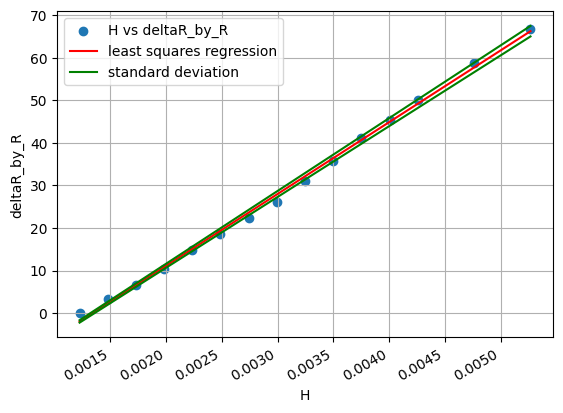

In [52]:
result = linregress(H, deltaR_by_R)

m = result.slope
b = result.intercept
delta_m = result.stderr 


fig2 = plt.figure()

ay = fig2.add_subplot(111)


ay.scatter(H, deltaR_by_R,label = 'H vs deltaR_by_R')

ay.plot(H, np.array(H) * m + b , color="red",label = 'least squares regression')
ay.plot(H, np.array(H) * (m +delta_m ) + b , color="green",label = 'standard deviation')
ay.plot(H, np.array(H) * (m-delta_m) + b , color="green")



#ay.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
#ay.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))


plt.xlabel(r"H")
plt.ylabel(r"deltaR_by_R")
fig2.autofmt_xdate()
plt.grid("TRUE")
#plt.title("Calibration curve: y = [{0}$\pm{1}$ ] x + {2} ".format(round(m,2),round(delta_m,2),round(b,2) ))
ay.legend()
plt.show()